In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
delivery=pd.read_csv("C:/Users/SAI/Desktop/DS Assignment/Assignment4/delivery_time (2).csv")

In [5]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\SAI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

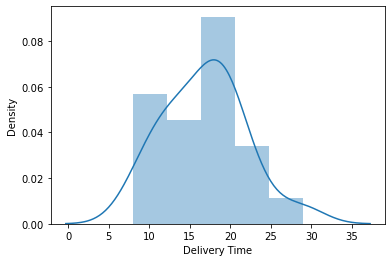

In [10]:
sns.distplot(delivery['Delivery Time'])

C:\Users\SAI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

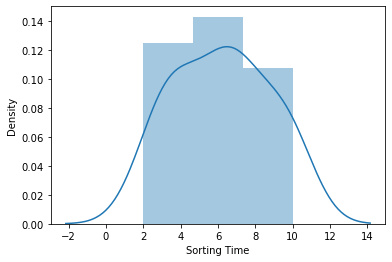

In [13]:
sns.distplot(delivery['Sorting Time'])

In [14]:
delivery1=delivery.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [15]:
delivery1


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

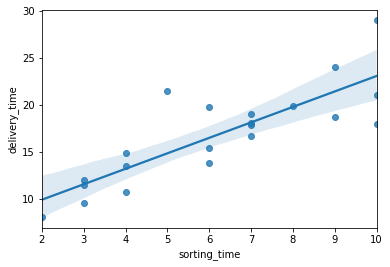

In [18]:
sns.regplot(x=delivery1['sorting_time'],y=delivery1['delivery_time'])

In [19]:
model=smf.ols("delivery_time~sorting_time",data=delivery1).fit()

In [20]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [21]:
model.tvalues ,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [22]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [24]:
new_data=pd.Series([4,6,9,10])

In [25]:
new_data

0     4
1     6
2     9
3    10
dtype: int64

In [27]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])

In [28]:
data_pred

,sorting_time
0,4
1,6
2,9
3,10


In [31]:
model.predict(data_pred)

0    13.178814
1    16.476853
2    21.423913
3    23.072933
dtype: float64